In [1]:
import numpy as np 
import pandas as pd
import polars as pl
import statsmodels.api as sm 
import statsmodels
from statsmodels.formula.api import ols 
import matplotlib.pyplot as plt
from scipy import stats as st
import statistics

In [2]:
path = 'Alzheimers-Mice-Data.csv'

In [3]:
mice_alzheimer_df = pl.read_csv(path)

mice_alzheimer_df.head()

AD_Status,Treatment,Training,Memory
i64,i64,i64,i64
1,1,12,10
1,1,15,12
1,1,13,13
1,1,12,10
1,1,14,13


In [4]:
# Training
# AD_STATUS 1:
AD1_Treatment1_training = mice_alzheimer_df.filter( AD_Status = 1, Treatment=1 ).select("Training").to_series().to_numpy()
AD1_Treatment2_training = mice_alzheimer_df.filter( AD_Status = 1, Treatment=2 ).select("Training").to_series().to_numpy()
AD1_Treatment3_training = mice_alzheimer_df.filter( AD_Status = 1, Treatment=3 ).select("Training").to_series().to_numpy()
AD1_Treatment4_training = mice_alzheimer_df.filter( AD_Status = 1, Treatment=4 ).select("Training").to_series().to_numpy()

# AD_STATUS 2:
AD2_Treatment1_training = mice_alzheimer_df.filter( AD_Status = 2, Treatment=1 ).select("Training").to_series().to_numpy()
AD2_Treatment2_training = mice_alzheimer_df.filter( AD_Status = 2, Treatment=2 ).select("Training").to_series().to_numpy()
AD2_Treatment3_training = mice_alzheimer_df.filter( AD_Status = 2, Treatment=3 ).select("Training").to_series().to_numpy()
AD2_Treatment4_training = mice_alzheimer_df.filter( AD_Status = 2, Treatment=4 ).select("Training").to_series().to_numpy()


# Memory
# AD_STATUS 1:
AD1_Treatment1_memory = mice_alzheimer_df.filter( AD_Status = 1, Treatment=1 ).select("Memory").to_series().to_numpy()
AD1_Treatment2_memory = mice_alzheimer_df.filter( AD_Status = 1, Treatment=2 ).select("Memory").to_series().to_numpy()
AD1_Treatment3_memory = mice_alzheimer_df.filter( AD_Status = 1, Treatment=3 ).select("Memory").to_series().to_numpy()
AD1_Treatment4_memory = mice_alzheimer_df.filter( AD_Status = 1, Treatment=4 ).select("Memory").to_series().to_numpy()

# AD_STATUS 2:
AD2_Treatment1_memory = mice_alzheimer_df.filter( AD_Status = 2, Treatment=1 ).select("Memory").to_series().to_numpy()
AD2_Treatment2_memory = mice_alzheimer_df.filter( AD_Status = 2, Treatment=2 ).select("Memory").to_series().to_numpy()
AD2_Treatment3_memory = mice_alzheimer_df.filter( AD_Status = 2, Treatment=3 ).select("Memory").to_series().to_numpy()
AD2_Treatment4_memory = mice_alzheimer_df.filter( AD_Status = 2, Treatment=4 ).select("Memory").to_series().to_numpy()

## Assumption 1: 

The Dependent Variables Training and Memory (we will use them in separate tests) are measured in the continuous level.

## Assumption 2:

Our two independent variables, AD_Status and Treatment, are measured in the categorical level.

## Assumption 3:

We can assume independence between each observation due to the nature of the experiment.

## Assumption 4: 

There should be no significant outliers between every groups

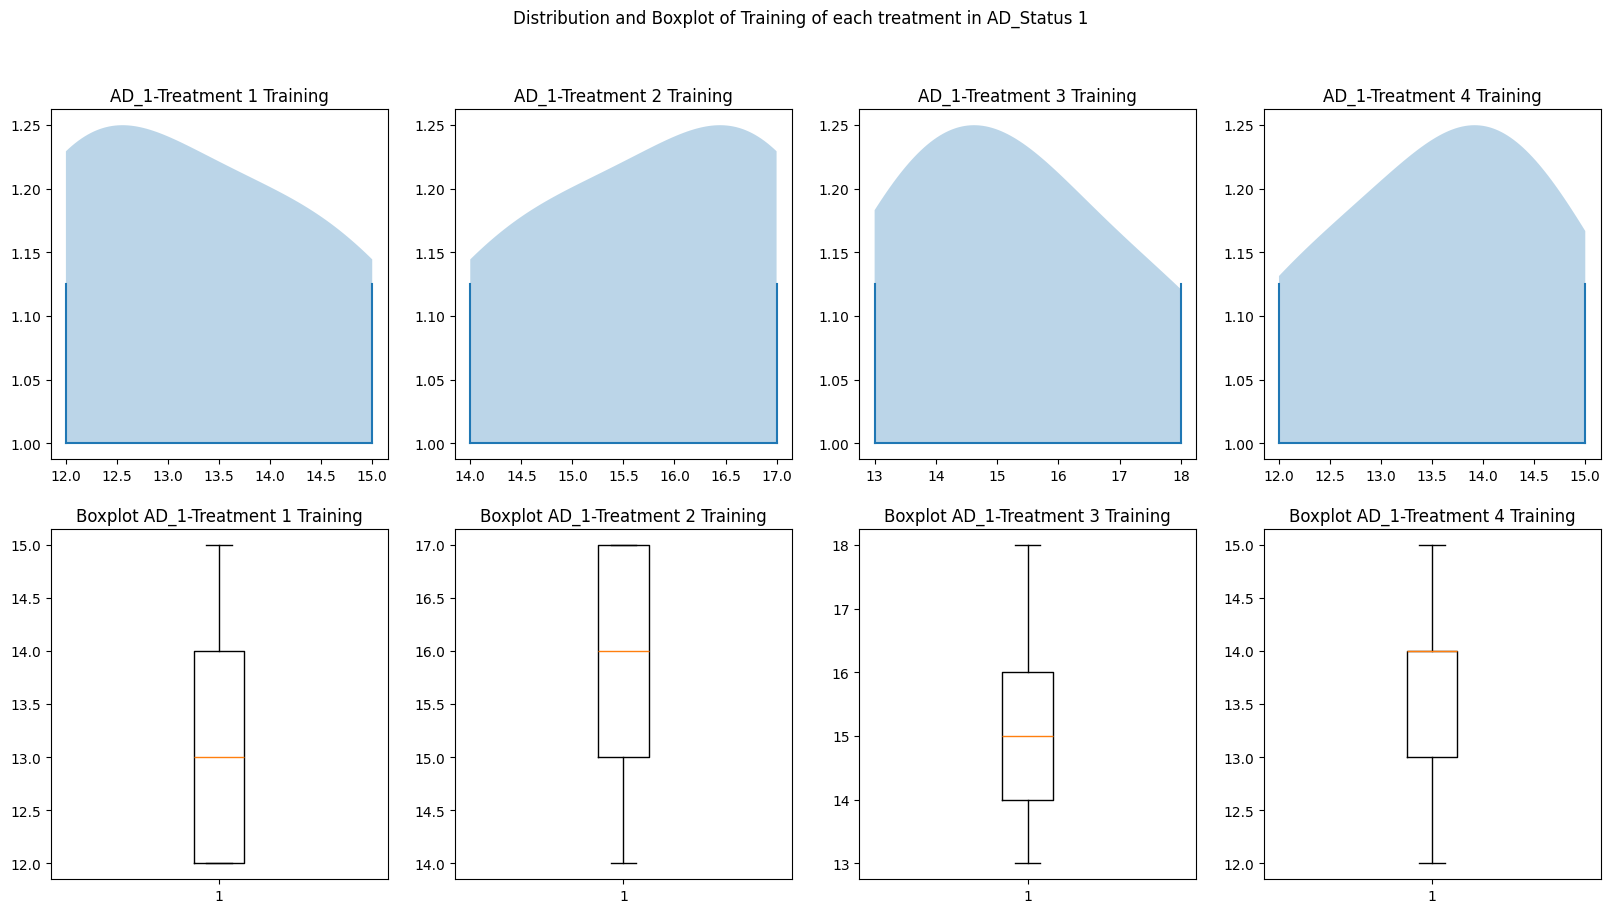

In [5]:
# Checking AD1 & Training data

fig, axs = plt.subplots(2,4, figsize=(20,10))
fig.suptitle("Distribution and Boxplot of Training of each treatment in AD_Status 1")

axs[0, 0].violinplot(AD1_Treatment1_training, side='high', vert=False)
axs[0, 0].set_title("AD_1-Treatment 1 Training")

axs[0, 1].violinplot(AD1_Treatment2_training, side='high', vert=False)
axs[0, 1].set_title("AD_1-Treatment 2 Training")

axs[0, 2].violinplot(AD1_Treatment3_training, side='high', vert=False)
axs[0, 2].set_title("AD_1-Treatment 3 Training")

axs[0, 3].violinplot(AD1_Treatment4_training, side='high', vert=False)
axs[0, 3].set_title("AD_1-Treatment 4 Training")

axs[1, 0].boxplot(AD1_Treatment1_training)
axs[1, 0].set_title("Boxplot AD_1-Treatment 1 Training")

axs[1, 1].boxplot(AD1_Treatment2_training)
axs[1, 1].set_title("Boxplot AD_1-Treatment 2 Training")

axs[1, 2].boxplot(AD1_Treatment3_training)
axs[1, 2].set_title("Boxplot AD_1-Treatment 3 Training")

axs[1, 3].boxplot(AD1_Treatment4_training)
axs[1, 3].set_title("Boxplot AD_1-Treatment 4 Training")

plt.show()

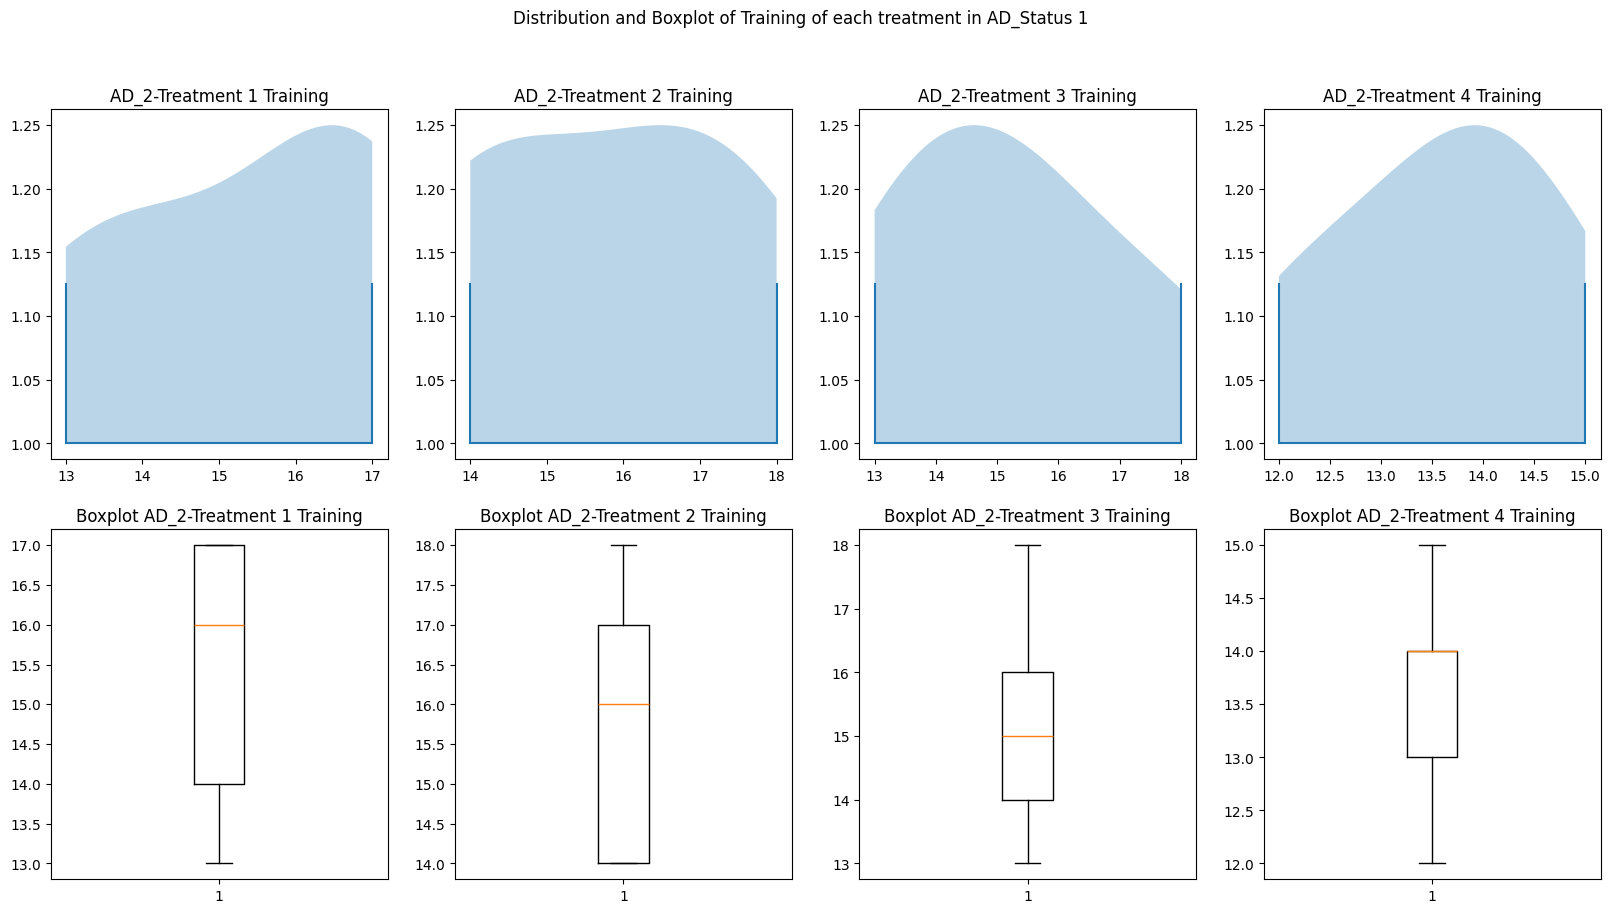

In [6]:
# Checking AD2 & Training data

fig, axs = plt.subplots(2,4, figsize=(20,10))
fig.suptitle("Distribution and Boxplot of Training of each treatment in AD_Status 1")

axs[0, 0].violinplot(AD2_Treatment1_training, side='high', vert=False)
axs[0, 0].set_title("AD_2-Treatment 1 Training")

axs[0, 1].violinplot(AD2_Treatment2_training, side='high', vert=False)
axs[0, 1].set_title("AD_2-Treatment 2 Training")

axs[0, 2].violinplot(AD2_Treatment3_training, side='high', vert=False)
axs[0, 2].set_title("AD_2-Treatment 3 Training")

axs[0, 3].violinplot(AD2_Treatment4_training, side='high', vert=False)
axs[0, 3].set_title("AD_2-Treatment 4 Training")

axs[1, 0].boxplot(AD2_Treatment1_training)
axs[1, 0].set_title("Boxplot AD_2-Treatment 1 Training")

axs[1, 1].boxplot(AD2_Treatment2_training)
axs[1, 1].set_title("Boxplot AD_2-Treatment 2 Training")

axs[1, 2].boxplot(AD2_Treatment3_training)
axs[1, 2].set_title("Boxplot AD_2-Treatment 3 Training")

axs[1, 3].boxplot(AD2_Treatment4_training)
axs[1, 3].set_title("Boxplot AD_2-Treatment 4 Training")

plt.show()

There are no extreme outliers in the groups of AD_Status and Treatment for training.

## Assumption 5

The dependent variable for all the combinations should be normally distributed.

In [7]:
for ad in range(2):
    if ad+1 == 1:
        for idx, data in enumerate([AD1_Treatment1_training, AD1_Treatment2_training, AD1_Treatment3_training, AD1_Treatment4_training]):
            test_stat, pval = st.shapiro(data)
            print(f"The shapiro test statistic for Training with AD_Status {ad+1} and Treatment {idx+1} is {test_stat} and its p value is {pval} ")

    if ad+1 == 2:
        for idx, data in enumerate([AD2_Treatment1_training, AD2_Treatment2_training, AD2_Treatment3_training, AD2_Treatment4_training]):
            test_stat, pval = st.shapiro(data)
            print(f"The shapiro test statistic for Training with AD_Status {ad+1} and Treatment {idx+1} is {test_stat} and its p value is {pval} ")
    print("\n")
    
        

The shapiro test statistic for Training with AD_Status 1 and Treatment 1 is 0.9020198201298117 and its p value is 0.42114965351611855 
The shapiro test statistic for Training with AD_Status 1 and Treatment 2 is 0.9020198201298121 and its p value is 0.42114965351612 
The shapiro test statistic for Training with AD_Status 1 and Treatment 3 is 0.9787161500642191 and its p value is 0.9276364233495382 
The shapiro test statistic for Training with AD_Status 1 and Treatment 4 is 0.9608589992013118 and its p value is 0.8139521277236892 


The shapiro test statistic for Training with AD_Status 2 and Treatment 1 is 0.866835872224429 and its p value is 0.2538464637612434 
The shapiro test statistic for Training with AD_Status 2 and Treatment 2 is 0.8939244932314427 and its p value is 0.3772224660924305 
The shapiro test statistic for Training with AD_Status 2 and Treatment 3 is 0.9787161500642191 and its p value is 0.9276364233495382 
The shapiro test statistic for Training with AD_Status 2 and T

All combinations are normal.

## Assumption 6

All combinations must have homogeneity of variances.

In [8]:
# levene's test

lev_stat, levpval = st.levene(AD1_Treatment1_training, AD1_Treatment2_training, AD1_Treatment3_training, AD1_Treatment4_training, AD2_Treatment1_training, AD2_Treatment2_training, AD2_Treatment3_training, AD2_Treatment4_training)
print(f"The Levene test statistic for political interest across the three groups are {lev_stat} and its p value is {levpval} ")

The Levene test statistic for political interest across the three groups are 0.4346076458752513 and its p value is 0.8730505780891101 


There is a homogeneity in variance.

## Testing for two-way ANOVA


In [9]:
# Descriptives
mice_alzheimer_df.group_by("AD_Status").agg(mean_training = pl.col("Training").mean(), std_training =  pl.col("Training").std()).sort("AD_Status")


AD_Status,mean_training,std_training
i64,f64,f64
1,14.45,1.731291
2,15.0,1.777047


In [10]:
mice_alzheimer_df.group_by("Treatment").agg(mean_training = pl.col("Training").mean(), std_training =  pl.col("Training").std()).sort("Treatment")

Treatment,mean_training,std_training
i64,f64,f64
1,14.3,1.888562
2,15.8,1.47573
3,15.2,1.813529
4,13.6,1.074968


In [11]:
# Descriptives
mice_alzheimer_df.group_by(["AD_Status", "Treatment"]).agg(mean_training = pl.col("Training").mean(), std_training =  pl.col("Training").std()).sort("AD_Status")


AD_Status,Treatment,mean_training,std_training
i64,i64,f64,f64
1,4,13.6,1.140175
1,3,15.2,1.923538
1,2,15.8,1.30384
1,1,13.2,1.30384
2,3,15.2,1.923538
2,2,15.8,1.788854
2,1,15.4,1.81659
2,4,13.6,1.140175


In [12]:
# create two way anova model with stats models:

model = ols('Training ~ C(AD_Status) + C(Treatment) + C(AD_Status):C(Treatment)' , 
            data=mice_alzheimer_df.to_pandas()).fit() 
result = sm.stats.anova_lm(model, type=2) 

print(result) 

                             df  sum_sq  mean_sq         F    PR(>F)
C(AD_Status)                1.0   3.025   3.0250  1.216080  0.278356
C(Treatment)                3.0  28.275   9.4250  3.788945  0.019678
C(AD_Status):C(Treatment)   3.0   9.075   3.0250  1.216080  0.319771
Residual                   32.0  79.600   2.4875       NaN       NaN


In [13]:
pandas_mice_df = mice_alzheimer_df.to_pandas()

model = ols('Training ~ C(AD_Status) + C(Treatment) + C(AD_Status):C(Treatment)' , 
            data=pandas_mice_df).fit() 
result = sm.stats.anova_lm(model, type=2) 

print(result) 

                             df  sum_sq  mean_sq         F    PR(>F)
C(AD_Status)                1.0   3.025   3.0250  1.216080  0.278356
C(Treatment)                3.0  28.275   9.4250  3.788945  0.019678
C(AD_Status):C(Treatment)   3.0   9.075   3.0250  1.216080  0.319771
Residual                   32.0  79.600   2.4875       NaN       NaN


In [14]:
# Effect Calculation

print(f"Eta squared of AD_Status is {3.0250/(3.0250+28.275+9.075+79.600)}")
print(f"Eta squared of Treatment is {28.275/(3.0250+28.275+9.075+79.600)}")
print(f"Eta squared of the interaction of AD status and Treatment is is {9.075/(3.0250+28.275+9.075+79.600)}")

Eta squared of AD_Status is 0.02521358616378412
Eta squared of Treatment is 0.2356740987705772
Eta squared of the interaction of AD status and Treatment is is 0.07564075849135236


In [15]:

tukey = statsmodels.stats.multicomp.pairwise_tukeyhsd(endog = pandas_mice_df['Training'], groups= pandas_mice_df['Treatment'] , alpha=0.05)

print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2      1.5  0.172 -0.4223  3.4223  False
     1      3      0.9 0.5931 -1.0223  2.8223  False
     1      4     -0.7 0.7612 -2.6223  1.2223  False
     2      3     -0.6 0.8347 -2.5223  1.3223  False
     2      4     -2.2 0.0196 -4.1223 -0.2777   True
     3      4     -1.6 0.1314 -3.5223  0.3223  False
----------------------------------------------------


# Report of Statistical Analysis

A two-factor Analysis of Variance (2B ANOVA) was done to figure out if the AD_Status and Treatment on mice with alzheimers affected the training days of mice, and if there is a combined effect. There are two AD_Status for the mice: 1 (n=20) and 2 (n=20). There was also four treatment types: 1 (n=10), 2 (n=10), 3 (n=10), and 4 (n=10). This is in line with the first assumption of a 2B ANOVA. The 2nd, that the dependent variable is continuous in nature, is met with the training day data. Each observation is also made independent of each other. There is also no outliers with the combinations of the two categorical groups, as seen using inspection of the boxplot; the combinations are found normally distributed (p value > 0.05), and that there is a homogeneity in the variances of the combinations (p value = 0.873 > 0.05). This allows us to continue with the 2B ANOVA, with a null hypothesis that there is no difference in the mean between combination of the groups, as well as that there is no difference in the mean between the groups of each categorical variable.

Hypothesis testing using 2B ANOVA shows that there is no significant interaction effect by the AD status of a mice and the treatment done to it ( F(3, 32) = 1.216, p value = 0.320 > 0.05, η2 = 0.075). The analysis of the main effect of AD Status was also performed, but also showed that the effect of AD Status on the training days of mice with alzheimers was insignificant ( F(1, 32) = 1.216, p value = 0.278 > 0.05, η2 = 0.075). The main effect of the Treatment on the training days proved to be significant ( F(3, 32) = 3.790, p value = 0.020 < 0.05, η2 = 0.236). 

A Post-Hoc Analysis of the Treatment, done with Tukey's Honest Significant Difference test, showed that the treatment group 2 (mean = 15.8, std = 1.476) and the treatment group 4 (mean = 13.6, std = 1.075). The post-hoc analysis showed a mean difference of -2.2 (%95 CI[ -4.1223, -0.2777]), and a p-value of 0.0196, leading us to reject the null hypothesis that these two treatment groups have difference in the training days of the mice with alzheimers.